In [4]:
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from IPython.core.pylabtools import figsize
import pickle
import pandas as pd
# import numpy as np
from sklearn.tree import DecisionTreeRegressor  # the dt regressor
# split the data into training data and testing data
from sklearn.model_selection import train_test_split
# from sklearn import metrics  # measure prediction performance
import matplotlib.pyplot as plt
from sklearn import tree


In [5]:
with open("rules_strategy.pickle", "rb") as p:
    data_rules = pickle.load(p)

In [6]:
data_rules = pd.DataFrame(data_rules)

In [7]:
data_rules['lag'] = data_rules['rules'].apply(lambda x: x.get('lag'))
data_rules['sigma'] = data_rules['rules'].apply(lambda x: x.get('sigma'))
data_rules['window_ma'] = data_rules['rules'].apply(lambda x: x.get('window_ma'))
data_rules['window_std'] = data_rules['rules'].apply(lambda x: x.get('window_std'))

In [8]:
X = data_rules[['lag', 'sigma', 'window_ma', 'window_std']]
y = data_rules['cumsum']

In [9]:
dregressor = DecisionTreeRegressor()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
dregressor = dregressor.fit(X_train, y_train)

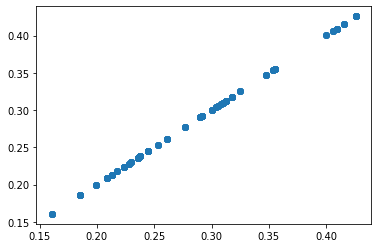

In [12]:
# Check reletionship between predicted value and value from train dataset
plt.scatter(dregressor.predict(X_train), y_train)

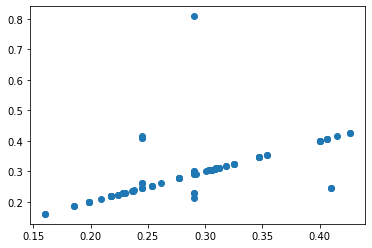

In [23]:
# Check reletionship between predicted value and value from test dataset
plt.scatter(dregressor.predict(X_test), y_test)

In [14]:
dot_data = tree.export_graphviz(dregressor, feature_names=list(X.columns), filled=True)
graph = graphviz.Source(dot_data, format='png')


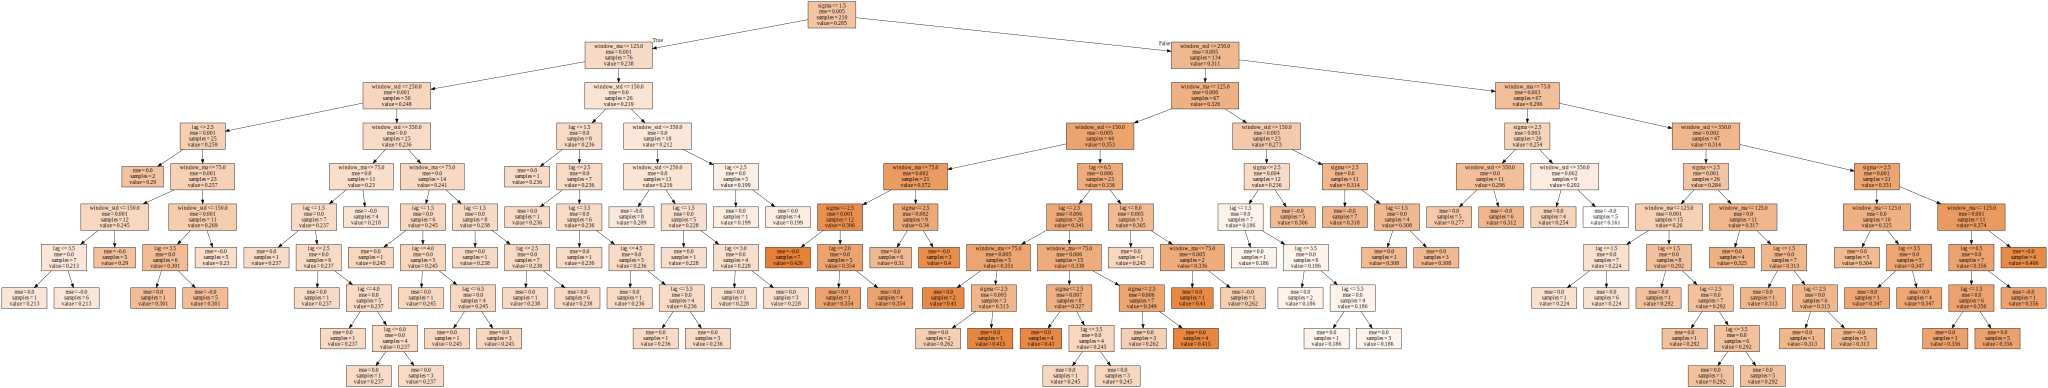

In [15]:
graph

In [16]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(dregressor, file)
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)
